# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importando Dataset

In [2]:
# Pegando apenas a 23 coluna para fazer o data frame 
# Adicionando um Header para a coluna  
df = pd.read_csv("../../data/Volt(4)/25072024-091913.csv",skiprows=1,header=None) 
print(df.head())

         0        1         2         3       4        5        6         7   \
0  1813.635  0.05957  0.936523 -0.334961  4.8125  2.56250  2.59375  0.047852   
1  1813.662  0.05957  0.936523 -0.334961  4.8125  2.56250  2.59375  0.047852   
2  1813.696  0.00000  0.841797 -0.414062 -0.1875  0.84375 -1.06250  0.047852   
3  1813.730  0.00000  0.841797 -0.414062 -0.1875  0.84375 -1.06250  0.047852   
4  1813.763  0.00000  0.841797 -0.414062 -0.1875  0.84375 -1.06250  0.047852   

         8         9   ...        15       16       17       18        19  \
0  0.297852  0.819336  ... -0.039062 -0.43750  0.59375 -0.93750  172.1034   
1  0.297852  0.819336  ... -0.039062 -0.43750  0.59375 -0.93750  172.1034   
2  0.297852  0.819336  ... -0.053711  0.90625 -0.06250  0.34375  172.1034   
3  0.297852  0.819336  ... -0.053711  0.90625 -0.06250  0.34375  172.1034   
4  0.297852  0.819336  ... -0.053711  0.90625 -0.06250  0.34375  172.1034   

         20        21        22        23        24  
0 

In [3]:
df.info()
print(df.isnull().sum())  # Quantidade de valores nulos
df.describe()
# Descrição estatistica da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       737 non-null    float64
 1   1       737 non-null    float64
 2   2       737 non-null    float64
 3   3       737 non-null    float64
 4   4       737 non-null    float64
 5   5       737 non-null    float64
 6   6       737 non-null    float64
 7   7       737 non-null    float64
 8   8       737 non-null    float64
 9   9       737 non-null    float64
 10  10      737 non-null    float64
 11  11      737 non-null    float64
 12  12      737 non-null    float64
 13  13      737 non-null    float64
 14  14      737 non-null    float64
 15  15      737 non-null    float64
 16  16      737 non-null    float64
 17  17      737 non-null    float64
 18  18      737 non-null    float64
 19  19      737 non-null    float64
 20  20      737 non-null    float64
 21  21      737 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,1825.884053,0.042758,0.783495,-0.538604,-2.056225,0.231895,-0.376696,0.121901,0.538020,0.575442,...,-0.134074,-0.365756,-1.343538,-0.063857,167.204248,207.195867,126.661405,219.468610,238.323177,121.639888
std,7.096078,0.095751,0.177782,0.226032,31.126108,10.482797,8.962996,0.167562,0.286058,0.324666,...,0.157448,12.365299,11.556922,6.203463,3.426471,8.258516,25.993057,13.534507,16.608214,23.546239
min,1813.635000,-0.223633,0.190430,-1.155273,-114.218800,-31.375000,-26.812500,-0.380859,-0.025391,-0.351562,...,-0.725586,-52.250000,-45.375000,-23.812500,161.043100,192.177900,106.971400,187.960000,208.082600,99.959470
25%,1819.759000,-0.028320,0.706055,-0.707031,-12.656250,-3.687500,-3.312500,0.033203,0.345703,0.433594,...,-0.237305,-2.750000,-4.406250,-1.593750,163.996600,200.201100,107.763900,213.309000,223.334600,102.764400
50%,1825.888000,0.041992,0.818359,-0.454102,-1.187500,0.343750,-1.000000,0.158203,0.397461,0.706055,...,-0.113281,0.000000,-0.312500,0.093750,167.033100,208.233900,112.395400,225.521000,240.381200,113.286000
75%,1832.016000,0.094727,0.882812,-0.385742,11.031250,4.000000,2.000000,0.243164,0.757812,0.790039,...,-0.019531,2.593750,3.531250,2.125000,170.438200,213.607100,141.626800,228.053600,253.829500,134.296400
max,1838.160000,0.323242,1.261719,-0.149414,116.750000,41.562500,39.968750,0.473633,1.601563,0.954102,...,0.191406,43.562500,31.718750,22.125000,173.340900,227.667900,183.760300,235.611400,258.843400,175.877200


In [4]:
# Contar valores ausentes
print("Valores nulos:", df.isnull().sum())

# Contar valores duplicados
print("Valores duplicados:", df.duplicated().sum())


Valores nulos: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Valores duplicados: 0


# Criação de Index temporal

In [5]:
# Criando uma coluna de tempo (considerando que a 1ª linha é o tempo 0s)]

# Definindo essa coluna como o índice do DataFrame

df["Tempo (s)"] = np.arange(len(df)) / 30

df.set_index("Tempo (s)", inplace=True)

# Visualizando os dados após a conversão
print(df.head())

#Usando isso podemos ver que o exercicio vai ter no Total de .... 
print(df.tail())


                 0        1         2         3       4        5        6   \
Tempo (s)                                                                    
0.000000   1813.635  0.05957  0.936523 -0.334961  4.8125  2.56250  2.59375   
0.033333   1813.662  0.05957  0.936523 -0.334961  4.8125  2.56250  2.59375   
0.066667   1813.696  0.00000  0.841797 -0.414062 -0.1875  0.84375 -1.06250   
0.100000   1813.730  0.00000  0.841797 -0.414062 -0.1875  0.84375 -1.06250   
0.133333   1813.763  0.00000  0.841797 -0.414062 -0.1875  0.84375 -1.06250   

                 7         8         9   ...        15       16       17  \
Tempo (s)                                ...                               
0.000000   0.047852  0.297852  0.819336  ... -0.039062 -0.43750  0.59375   
0.033333   0.047852  0.297852  0.819336  ... -0.039062 -0.43750  0.59375   
0.066667   0.047852  0.297852  0.819336  ... -0.053711  0.90625 -0.06250   
0.100000   0.047852  0.297852  0.819336  ... -0.053711  0.90625 -0.06250 

# Separação de Quadril e Joelho 

### Seleção das colunas que contém os ângulos Quadril e Joelho (XYZ)

In [6]:

# Selecionar colunas de interesse
quadril_x = df.iloc[:, 19]
quadril_y = df.iloc[:, 20]
quadril_z = df.iloc[:, 21]
joelho_x = df.iloc[:, 22]
joelho_y = df.iloc[:, 23]
joelho_z = df.iloc[:, 24]

# Renomear colunas para facilitar análise
quadril_x.name = "Quadril X"
quadril_y.name = "Quadril Y"
quadril_z.name = "Quadril Z"
joelho_x.name = "Joelho X"
joelho_y.name = "Joelho Y"
joelho_z.name = "Joelho Z"

# Análise estatística individual
print("\nAnálise do Quadril:")
print(pd.DataFrame({quadril_x.name: quadril_x.describe(),
                    quadril_y.name: quadril_y.describe(),
                    quadril_z.name: quadril_z.describe()}))

print("\nAnálise do Joelho:")
print(pd.DataFrame({joelho_x.name: joelho_x.describe(),
                    joelho_y.name: joelho_y.describe(),
                    joelho_z.name: joelho_z.describe()}))




Análise do Quadril:
        Quadril X   Quadril Y   Quadril Z
count  737.000000  737.000000  737.000000
mean   167.204248  207.195867  126.661405
std      3.426471    8.258516   25.993057
min    161.043100  192.177900  106.971400
25%    163.996600  200.201100  107.763900
50%    167.033100  208.233900  112.395400
75%    170.438200  213.607100  141.626800
max    173.340900  227.667900  183.760300

Análise do Joelho:
         Joelho X    Joelho Y    Joelho Z
count  737.000000  737.000000  737.000000
mean   219.468610  238.323177  121.639888
std     13.534507   16.608214   23.546239
min    187.960000  208.082600   99.959470
25%    213.309000  223.334600  102.764400
50%    225.521000  240.381200  113.286000
75%    228.053600  253.829500  134.296400
max    235.611400  258.843400  175.877200


# Fazendo a Visualização de Dados

## Graficos dos Eixos X, Y e Z do Quadril e Joelho

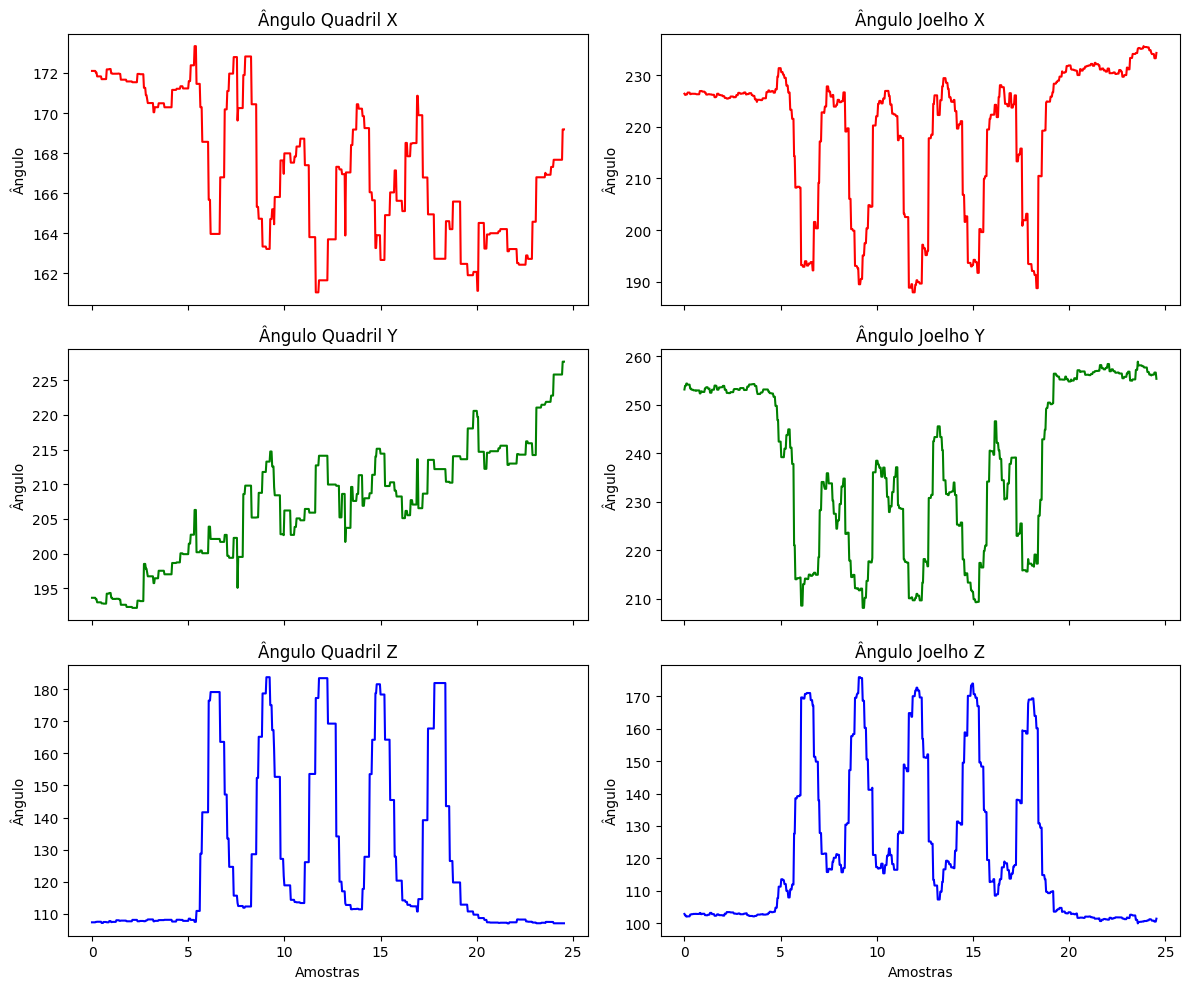

In [7]:
# Criar subplots 3x2 (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

# Plot ângulos do quadril
axes[0, 0].plot(quadril_x, color="red")
axes[0, 0].set_title("Ângulo Quadril X")
axes[0, 0].set_ylabel("Ângulo")

axes[1, 0].plot(quadril_y, color="green")
axes[1, 0].set_title("Ângulo Quadril Y")
axes[1, 0].set_ylabel("Ângulo")

axes[2, 0].plot(quadril_z, color="blue")
axes[2, 0].set_title("Ângulo Quadril Z")
axes[2, 0].set_xlabel("Amostras")
axes[2, 0].set_ylabel("Ângulo")

# Plot ângulos do joelho
axes[0, 1].plot(joelho_x, color="red")
axes[0, 1].set_title("Ângulo Joelho X")
axes[0, 1].set_ylabel("Ângulo")

axes[1, 1].plot(joelho_y, color="green")
axes[1, 1].set_title("Ângulo Joelho Y")
axes[1, 1].set_ylabel("Ângulo")

axes[2, 1].plot(joelho_z, color="blue")
axes[2, 1].set_title("Ângulo Joelho Z")
axes[2, 1].set_xlabel("Amostras")
axes[2, 1].set_ylabel("Ângulo")

plt.tight_layout()
plt.show()

É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

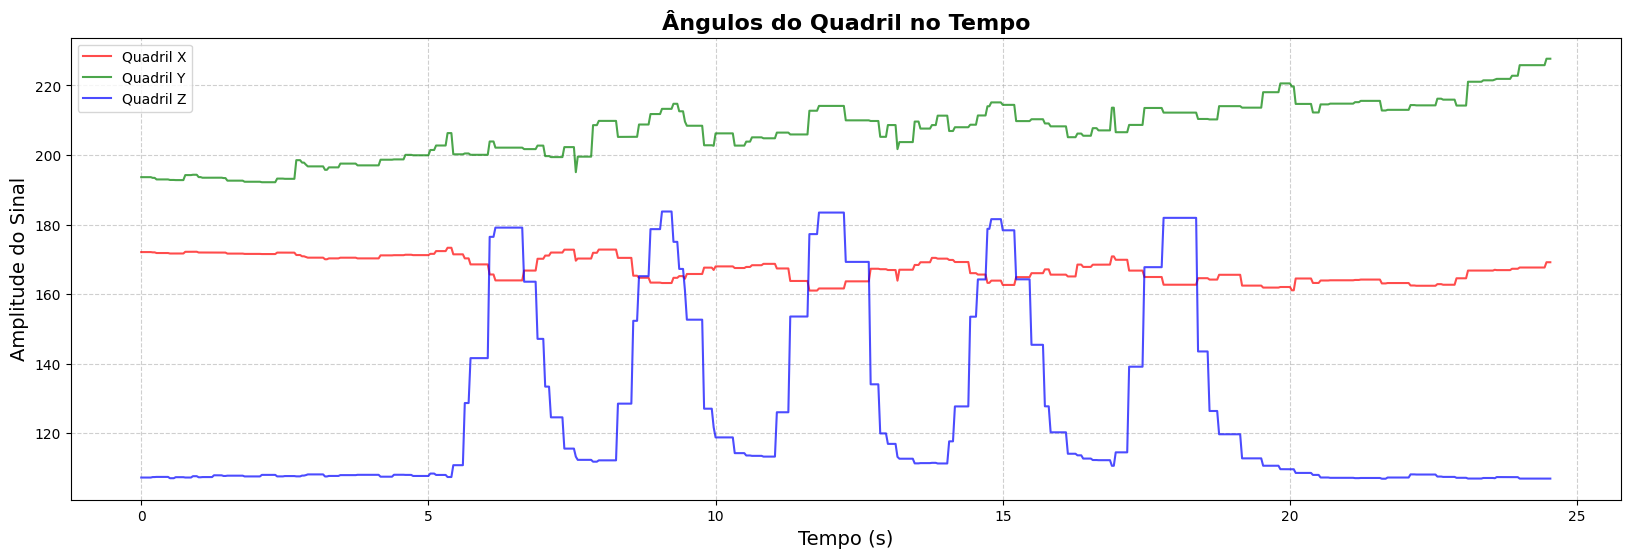

In [8]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, quadril_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, quadril_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, quadril_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

## Graficos dos Eixos X, Y e Z do Joelho com o index temporal

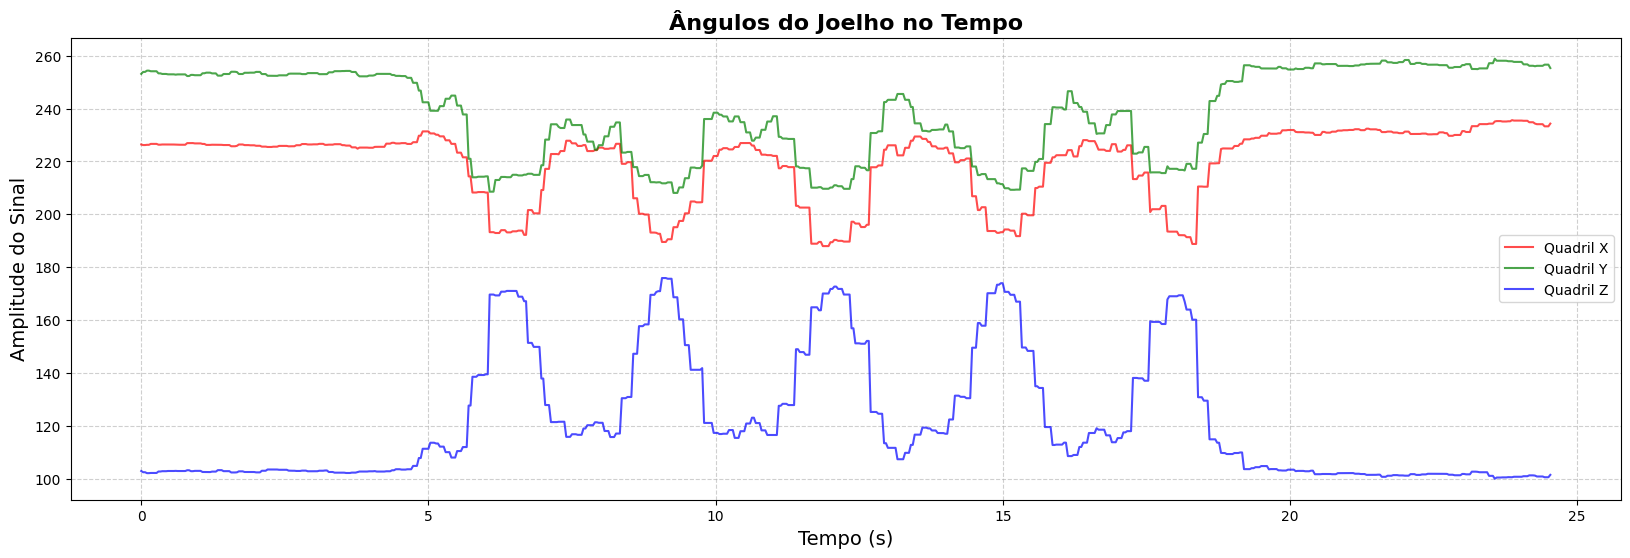

In [9]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, joelho_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, joelho_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, joelho_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.









## Grafico do Quadril e Joelho junto 

<Figure size 640x480 with 0 Axes>

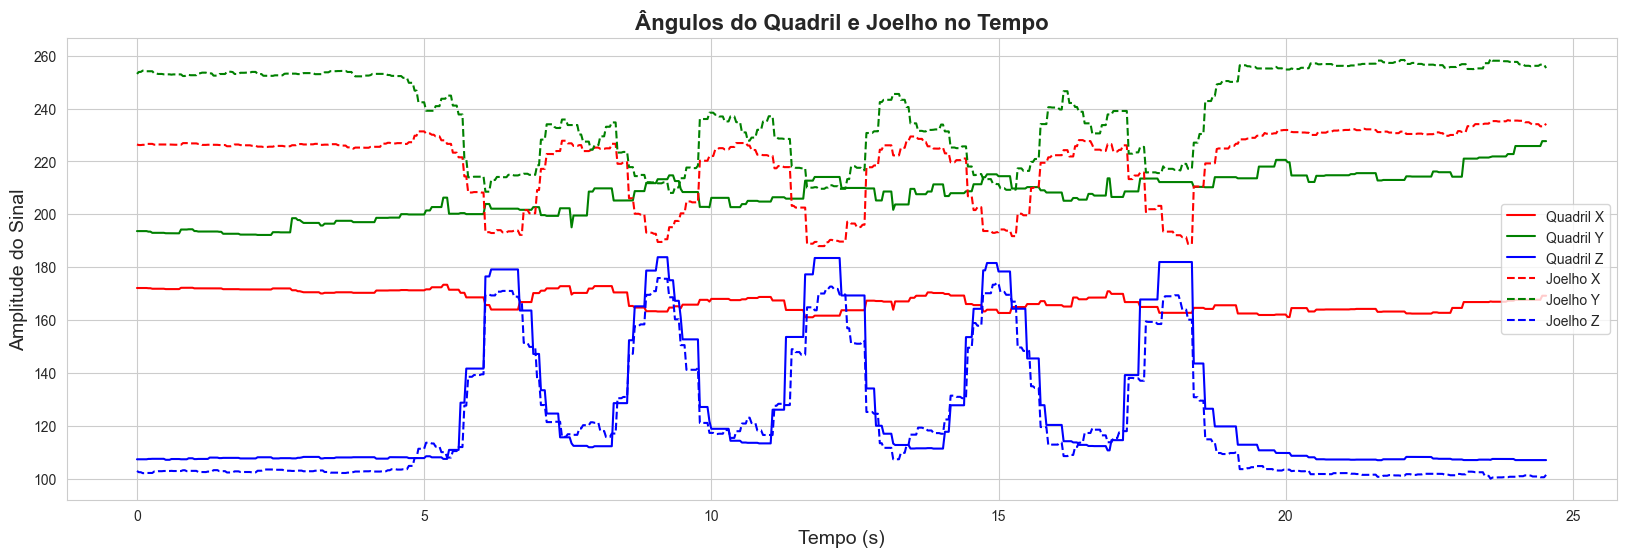

In [10]:

plt.clf()
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df.index, y=quadril_x, color='red', label="Quadril X")
sns.lineplot(x=df.index, y=quadril_y, color='green', label="Quadril Y")
sns.lineplot(x=df.index, y=quadril_z, color='blue', label="Quadril Z")

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df.index, y=joelho_x, color='red', linestyle="--", label="Joelho X")
sns.lineplot(x=df.index, y=joelho_y, color='green', linestyle="--", label="Joelho Y")
sns.lineplot(x=df.index, y=joelho_z, color='blue', linestyle="--", label="Joelho Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()

Identificação de que o joelho se movimenta primeiro que o quadril

## Manipulação do tempo para melhor visualização dos gráficos

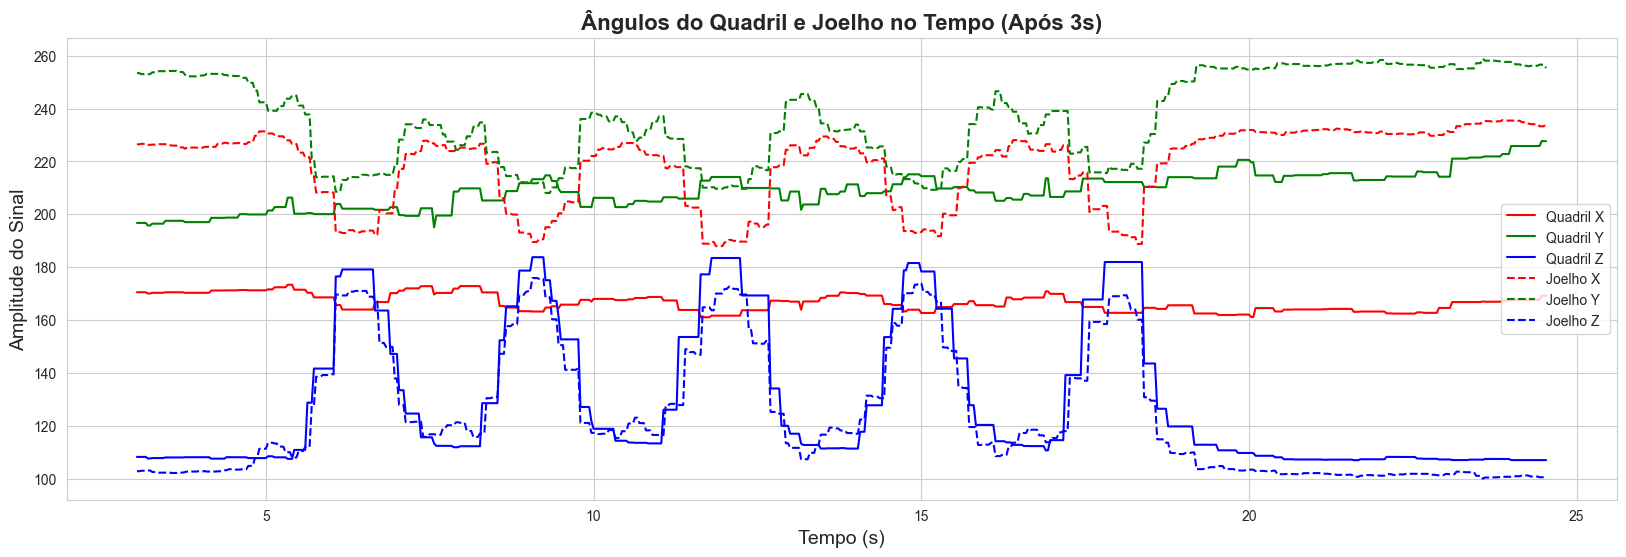

In [11]:


# Filtrar os dados para remover os primeiros 3 segundos
df_filtrado = df.loc[df.index > 3].copy() 

# Estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 19], color='red', label="Quadril X")  # Coluna 19ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 20], color='green', label="Quadril Y")  # Coluna 20ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 21], color='blue', label="Quadril Z")  # Coluna 21ª

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 22], color='red', linestyle="--", label="Joelho X")  # Coluna 22ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 23], color='green', linestyle="--", label="Joelho Y")  # Coluna 23ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 24], color='blue', linestyle="--", label="Joelho Z")  # Coluna 24ª

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo (Após 3s)", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()


# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.